In [1]:
from devExamplesContext import fst, fstUtils
import graphviz
from IPython.display import display, Markdown

isContains

[['S1', 'a', 'S3'], ['S2', 'a', 'S1'], ['S3', 'a', 'S2'], ['S1', 'b', 'S1'], ['S2', 'b', 'S2'], ['S3', 'b', 'S3'], ['S2', None, 'S3'], ['S1', 'a', 'S2'], ['S1', 'c', 'S4'], ['S3', None, 'S4'], ['S4', 'a', None]]
{('S1', 'a'): ['S3', 'S2'], ('S2', 'a'): 'S1', ('S3', 'a'): 'S2', ('S1', 'b'): 'S1', ('S2', 'b'): 'S2', ('S3', 'b'): 'S3', ('S2', None): 'S3', ('S1', 'c'): 'S4', ('S3', None): 'S4', ('S4', 'a'): None}


| Input \ State | S1 | S2 | S3 | S4 |
|:---:|:---:|:---:|:---:|:---:|
| a | S3, S2 | S1 | S2 | - |
| b | S1 | S2 | S3 | - |
| c | S4 | - | - | - |
| ε | - | S3 | S4 | - |


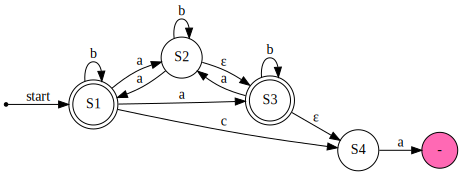

In [2]:
initState = 'S1'
transitionFunction = [
    ['S1','a','S3'], ['S2','a','S1'], ['S3','a','S2'],
    ['S1','b','S1'], ['S2','b','S2'], ['S3','b','S3'],
    ['S2',None,'S3'],
    ['S1','a','S2'],
    ['S1','c','S4'], ['S3',None,'S4'],
    ['S4','a',None],
    ]
finalStates = ['S1', 'S3']

fsm = fst( initState = initState,
        transitionFunction = transitionFunction,
        finalStates = finalStates,
    )

print( fsm.transitionFunction )
print( fsm.trFuncDict )
display(Markdown(fsm.toMdTable()))
# graphviz.Source(fsm.toDot())
graphviz.Source(fstUtils.toDot(fsm))

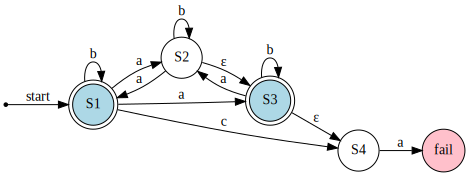

In [3]:
graphviz.Source(fstUtils.toDot(fsm, colorOfNoneState='pink', highlightStates=['S1','S3'], highlightStatesColor='lightblue'))

In [4]:
print( "getEpsilonClosure(\'S2\') => " + str(fsm.getEpsilonClosure( 'S2' )) )
print( "getEpsilonClosure(\'S3\') => " + str(fsm.getEpsilonClosure( 'S3' )) )
print( fsm.getEpsilonClosure( set( ['S4', 'S1'] ) ) )
print( "getNextStates S4, S1 & a => " + str(fsm.getNextStates( ['S4', 'S1'], 'a' )) )
print( "getNextStates S4, S1 & a => " + str(fsm.getNextStates( ['S4', 'S1'], 'a' )) )
print( "getNextStates S4 & a => " + str(fsm.getNextStates( 'S4', 'a' )) )
print( "getNextStates S2 & None => " + str(fsm.getNextStates( 'S2', None )) )
print( fsm.playFSM('ba', debug=1) )
print( fsm.playFSM('ca', debug=1) )

getEpsilonClosure('S2') => {'S4', 'S3', 'S2'}
getEpsilonClosure('S3') => {'S4', 'S3'}
{'S1', 'S4'}
getNextStates S4, S1 & a => {None, 'S3', 'S2'}
getNextStates S4, S1 & a => {None, 'S3', 'S2'}
getNextStates S4 & a => {None}
getNextStates S2 & None => {'S3'}
--> Start print debug info for playFSM():
-->   curent state(s): {'S1'}
-->   input signal: b
-->     next state(s): {'S1'}
-->       + ε-closure: {'S1'}
-->   curent state(s): {'S1'}
-->   input signal: a
-->     next state(s): {'S3', 'S2'}
-->       + ε-closure: {'S4', 'S3', 'S2'}
--> accepting state(s): {'S3'}
True
--> Start print debug info for playFSM():
-->   curent state(s): {'S1'}
-->   input signal: c
-->     next state(s): {'S4'}
-->       + ε-closure: {'S4'}
-->   curent state(s): {'S4'}
-->   input signal: a
-->     next state(s): {None}
-->       + ε-closure: {None}
--> last states: {None}, all accepting states: ['S1', 'S3']
False


In [5]:
print( fstUtils.toDot(fsm, colorOfNoneState='pink', highlightStates=['S1','S3'], highlightStatesColor='lightblue') )
print( "To be continued ..." )

digraph fst {
	rankdir=LR;
	node [shape=point]; start;
	node [shape=circle];
	"S1" [shape=doublecircle, style=filled, fillcolor=lightblue, label="S1"];
	start -> "S1" [label=start];
	node [shape=circle];
	"S2" [label="S2"];
	"S3" [shape=doublecircle, style=filled, fillcolor=lightblue, label="S3"];
	"S4" [label="S4"];
	"-" [style=filled, fillcolor=pink, label="fail"];
	node [style=filled, fillcolor=hotpink];
	"S1" -> "S3" [label=a];
	"S2" -> "S1" [label=a];
	"S3" -> "S2" [label=a];
	"S1" -> "S1" [label=b];
	"S2" -> "S2" [label=b];
	"S3" -> "S3" [label=b];
	"S2" -> "S3" [label=ε];
	"S1" -> "S2" [label=a];
	"S1" -> "S4" [label=c];
	"S3" -> "S4" [label=ε];
	"S4" -> "-" [label=a];
}
To be continued ...
